### **RED WINE QUALITY**



#Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/content/winequality-red.csv")

In [3]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Standardization with 2 methods (z-scoring, range normalization)

In [5]:
rank= pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0,100)).fit_transform(data), columns=data.columns)
z_scoring= pd.DataFrame(preprocessing.StandardScaler().fit_transform(data), columns=data.columns)
ranges=(data-np.mean(data))/(np.max(data)-np.min(data))
ranges

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205
1,-0.045986,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844,-0.127205
2,-0.045986,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844,-0.127205
3,0.254899,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844,0.072795
4,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.187579,0.049438,-0.190976,-0.036904,0.004229,0.227114,-0.008720,-0.135586,0.109360,-0.046796,0.011849,-0.127205
1595,-0.214127,0.015191,-0.170976,-0.023206,-0.042515,0.325705,0.016015,-0.119433,0.164478,0.060989,0.119541,0.072795
1596,-0.178729,-0.012206,-0.140976,-0.016357,-0.019143,0.184860,-0.022854,-0.073912,0.085738,0.055001,0.088772,0.072795
1597,-0.214127,0.080260,-0.150976,-0.036904,-0.020812,0.227114,-0.008720,-0.093736,0.203848,0.031049,-0.034305,-0.127205


In [6]:
#For the convenience we will create list of 2 versions of standardization

In [7]:
sets=[z_scoring, ranges]
scatters=np.zeros(2)
scatters

array([0., 0.])

Data scatter

In [8]:
for i in range(len(sets)):
  scatters[i]=sum(sum(sets[i].values**2))
scatters

array([19188.       ,   359.0599926])

SVD

In [9]:
us, ss, vs = list(), list(), list()
for i in sets:
  u, s, v = np.linalg.svd(i)
  us.append(u)
  ss.append(s)
  vs.append(v)
ss

[array([70.64522028, 59.8729437 , 51.87473939, 44.07741345, 39.44931595,
        32.54973115, 31.44344379, 28.44099541, 25.64528711, 22.89853947,
        16.97555853,  9.75546767]),
 array([10.74572067,  8.86019604,  6.94988416,  4.96596577,  4.7591985 ,
         4.0931432 ,  4.04643273,  3.44570854,  3.21622184,  2.76313915,
         2.15216087,  1.36512497])]

Load vectors

In [10]:
vs[0][:, 0]

array([ 0.48788336, -0.00417321,  0.16482854,  0.23109808, -0.07877938,
        0.0555313 , -0.30721496,  0.20052866, -0.17457815,  0.18295601,
       -0.25643792,  0.63857976])

In [11]:
vs[0][:, 1]

array([-0.26512898,  0.33896786,  0.22708884, -0.04185824,  0.29937933,
        0.297287  , -0.62623369,  0.14612614, -0.06022334, -0.15510563,
        0.37716123,  0.00466168])

In [12]:
vs[1][:, 0]

array([ 0.49837736, -0.12870815,  0.14462475, -0.1865083 ,  0.28330633,
       -0.33700306,  0.0450038 ,  0.36080835, -0.08471947,  0.05671207,
        0.13536795, -0.56973053])

In [13]:
vs[1][:, 1]

array([-0.24552142, -0.21349029,  0.13285519, -0.20260857,  0.41521605,
       -0.11306672,  0.47636504, -0.12865451,  0.53646013, -0.15648121,
       -0.30736248, -0.00536444])

Feature engineering part

In [14]:
# Checking for missing values
ms_vl = data.isnull().sum()
ms_vl_table = pd.DataFrame({"Number of missing values": ms_vl})
ms_vl_table

,Number of missing values
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [15]:
# Checking and deleting duplicates
total_duplicates = data.duplicated().sum()
print("Duplicates: ", total_duplicates)
data_mn = data.drop_duplicates().reset_index(drop=True)

Duplicates:  240


In [16]:
data_mn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
data_mn.describe().T # Getting descriptive statistics

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


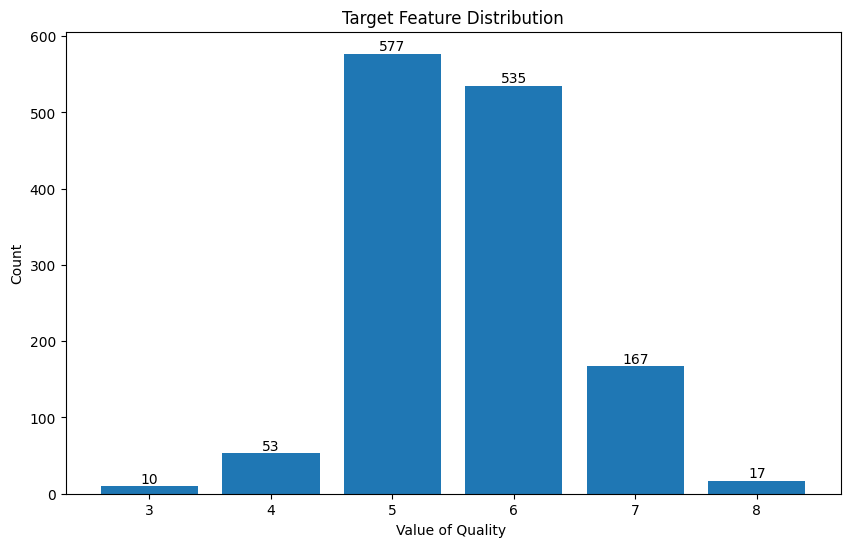

In [18]:
import matplotlib.pyplot as plt
# Count each value of quality variable
plt.figure(figsize=(10, 6))
z = data_mn["quality"].value_counts()
order = sorted(z.index, reverse=True)

bars = plt.bar(order, z[order])
plt.title("Target Feature Distribution")
plt.xlabel("Value of Quality ")
plt.ylabel("Count")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [19]:
data_bin  = data_mn.copy()
feats = data_bin.columns.tolist()
feats.remove("quality")
features = data_mn[feats].copy() # Features which we need

In [20]:
skew_df = data_bin[feats].skew()
skew_df = pd.DataFrame({"Skewness": skew_df})
skew_df

,Skewness
fixed acidity,0.941041
volatile acidity,0.729279
citric acid,0.312726
residual sugar,4.548153
chlorides,5.502487
free sulfur dioxide,1.226579
total sulfur dioxide,1.540368
density,0.044778
pH,0.232032
sulphates,2.406505


In [21]:
bin_edges = [0,6.5,10]
group_names = ["Bad","Good"]

data_bin["quality"] = pd.cut(data_bin["quality"], bins=bin_edges, labels=group_names)
data_bin["quality"].unique()

['Bad', 'Good']
Categories (2, object): ['Bad' < 'Good']

In [22]:
data_bin["quality"] = data_bin["quality"].replace({"Bad":0,"Good":1})

In [23]:
quality_counts = data_bin["quality"].value_counts()
quality_counts

0    1175
1     184
Name: quality, dtype: int64

In [24]:
data_bin.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
728,7.1,0.685,0.35,2.0,0.088,9.0,92.0,0.99630,3.28,0.62,9.40,0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.40,0
1310,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,0
268,10.3,0.410,0.42,2.4,0.213,6.0,14.0,0.99940,3.19,0.62,9.50,0
1080,6.9,0.410,0.31,2.0,0.079,21.0,51.0,0.99668,3.47,0.55,9.50,0


Linear Regression

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

In [26]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [27]:
features

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [28]:
X = features
Y = data_bin["quality"]
X

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [43]:
# Creating test and train parts
np.random.seed(42)
n = len(X)
idx = np.random.permutation(n)

train_ratio = 0.7 # Defining the train-test split ratio
train_size = int(n * train_ratio)

# Splitting the data using the index array
X_train, X_test = X[idx[:train_size]], X[idx[train_size:]]
Y_train, Y_test = Y[idx[:train_size]], Y[idx[train_size:]]

print("Shape of train and test:", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Shape of train and test: (951, 11) (408, 11) (951,) (408,)


In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Training the model
model.fit(X_train,Y_train)

LinearRegression()

In [45]:
tr_prd = model.predict(X_train)

In [48]:
res = pd.DataFrame({'Real Labels': Y_train, 'Predicted Labels': tr_prd})
res

,Real Labels,Predicted Labels
51,0,-0.045323
1100,0,0.176109
1312,1,0.350117
514,0,-0.073324
1074,0,0.088066
...,...,...
733,0,0.070107
1356,0,0.177050
1259,0,-0.001436
611,0,-0.017333


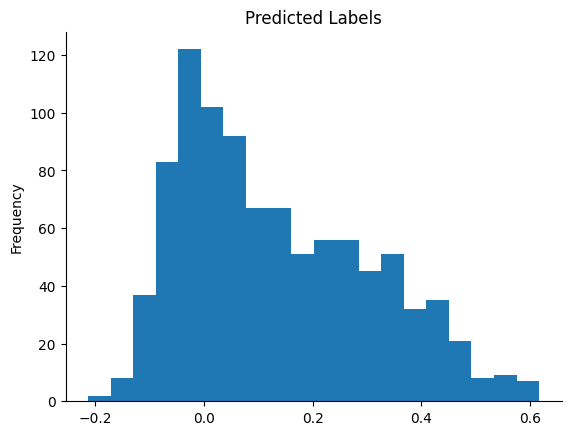

In [47]:
from matplotlib import pyplot as plt
res['Predicted Labels'].plot(kind='hist', bins=20, title='Predicted Labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_train, tr_prd)
r2

0.25944026572498236

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, tr_prd)
mse

0.08568997056882074

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_train, tr_prd)
mae

0.20121631551446065